# Ciclo 2 Aprendizado supervisionado Tarefa Classificação

## 1. Import Libearies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt

### 1.1 Load Dataset

In [2]:
dataset_path = '../data/train.csv'
df = pd.read_csv(dataset_path)

In [3]:
df.head()

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,limite_adicional
0,1767,21,278.172008,2577.05,24196.89636,104.306544,31.038763,6,5,7,21,14,9,15,Não,Não,Negar
1,11920,40,268.874152,2465.39,19227.37796,69.858778,36.917093,5,8,5,40,23,10,18,Não,Não,Negar
2,8910,36,446.643127,1055.29,42822.28223,134.201478,34.561714,0,3,6,26,13,3,15,Sim,Não,Negar
3,4964,58,321.141267,703.05,51786.82600,297.350067,31.493561,0,3,7,12,7,2,1,Sim,Não,Negar
4,10100,35,428.716114,891.29,44626.85346,134.201478,28.028887,2,8,7,24,10,8,20,Sim,Não,Negar


In [4]:
df['limite_adicional'].value_counts()

Negar       7995
Conceder    1505
Name: limite_adicional, dtype: int64

In [5]:
df['limite_adicional'].value_counts(normalize=True)

Negar       0.841579
Conceder    0.158421
Name: limite_adicional, dtype: float64

In [6]:
df.loc[:, 'limite_adicional'].unique()

array(['Negar', 'Conceder'], dtype=object)

## 2. Seleção de Features

In [7]:
df.columns

Index(['id_cliente', 'idade', 'saldo_atual', 'divida_atual', 'renda_anual',
       'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
       'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
       'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros',
       'investe_exterior', 'pessoa_polit_exp', 'limite_adicional'],
      dtype='object')

In [8]:
# x = feature_treianmento
# y = label

feature =['idade', 'saldo_atual', 'divida_atual', 'renda_anual',
       'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
       'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
       'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros']

label = ['limite_adicional']

x_train = df[feature]
y_train = df['limite_adicional']

## 3. Treinamento

In [9]:
k = 7
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [10]:
y_pred = knn_classifier.predict(x_train)
y_pred

array(['Negar', 'Negar', 'Negar', ..., 'Negar', 'Negar', 'Negar'],
      dtype=object)

In [11]:
df_result = df.copy()
df_result['classificação'] = y_pred

In [12]:
mt.confusion_matrix(y_train, y_pred)

array([[ 369, 1136],
       [ 203, 7792]])

In [13]:
df_result[['id_cliente', 'idade','limite_adicional','classificação']].sample(20)

,id_cliente,idade,limite_adicional,classificação
485,11419,47,Negar,Negar
8740,8502,49,Negar,Negar
20,5911,60,Conceder,Negar
7406,9974,56,Negar,Negar
1517,3014,32,Conceder,Conceder
8614,4856,31,Conceder,Negar
498,9097,41,Negar,Negar
280,4644,47,Conceder,Negar
2391,3412,20,Negar,Negar
942,7470,23,Negar,Negar


## 4.0 Performance

#### 4.1 Matriz de confusão

In [14]:
df_result[['id_cliente', 'idade','limite_adicional','classificação']].sample(20)

,id_cliente,idade,limite_adicional,classificação
3659,4852,50,Negar,Negar
3625,1420,23,Negar,Negar
3800,3922,35,Negar,Negar
4613,6546,43,Negar,Negar
9412,8211,19,Negar,Negar
5808,11721,52,Conceder,Conceder
9095,12301,5979,Negar,Negar
318,625,23,Negar,Negar
3554,9449,35,Negar,Negar
8228,3505,43,Negar,Negar


In [15]:
mt.confusion_matrix(y_train, y_pred)

array([[ 369, 1136],
       [ 203, 7792]])

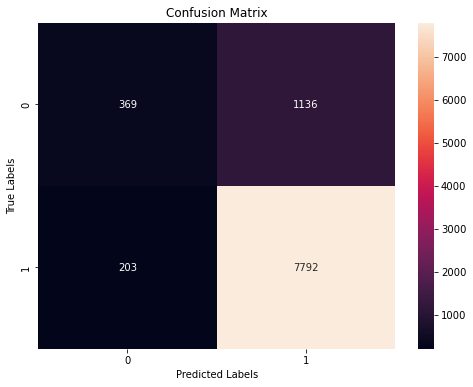

In [16]:
cm = mt.confusion_matrix(y_train, y_pred)
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### 4.2 Acurracy

#### $$ Acurracy = \frac {TP + TN}{P+N}$$

In [17]:
df_result['acertos'] = df_result.loc[:, ['id_cliente','limite_adicional','classificação']].apply(lambda x : 1 if x['limite_adicional'] == x['classificação'] else 0, axis=1)

In [18]:
df_result[['id_cliente', 'idade','limite_adicional','classificação', 'acertos']].sample(20)

,id_cliente,idade,limite_adicional,classificação,acertos
930,11599,59,Negar,Negar,1
1841,9921,23,Negar,Negar,1
9188,12101,34,Negar,Negar,1
4485,4803,50,Negar,Negar,1
4044,11757,29,Conceder,Negar,0
7815,2806,19,Negar,Negar,1
1452,5837,23,Negar,Negar,1
9376,2498,32,Negar,Negar,1
1744,8704,34,Negar,Negar,1
4120,10892,56,Negar,Negar,1


In [19]:
df_result.shape

(9500, 19)

In [20]:
round(8161 / 9500 *100,2)

85.91

In [21]:
df_result['acertos'].sum()

8161

In [22]:
round(mt.accuracy_score(y_train,y_pred),2)

0.86

##### 4.3 Precision


#### $$ Precisão = \frac {TP}{TP+FP}$$

In [33]:
mt.precision_score(y_true=y_train,y_pred=y_pred, pos_label='Conceder' )

0.6451048951048951

In [34]:
mt.precision_score(y_true=y_train,y_pred=y_pred, pos_label='Negar' )

0.8727598566308243

##### 4.4 Recall

#### $$ Precisão = \frac {TP}{TP+FN}$$

In [37]:
mt.recall_score( y_train, y_pred, pos_label='Conceder' )

0.24518272425249169

In [38]:
mt.recall_score( y_train, y_pred, pos_label='Negar' )

0.9746091307066916

##### 4.5 F1


#### $$ F1 = \frac {Precision * Recall}{Precision + Recall}$$

O F1 Score varia de 0 a 1, onde:

F1 Score = 1: Modelo perfeito que possui tanto alta precisão quanto recall.

F1 Score = 0: Modelo com baixo desempenho, seja na precisão ou no recall.

In [31]:
mt.f1_score( y_train, y_pred, pos_label='Conceder' )

0.3553201733269138

In [39]:
mt.f1_score( y_train, y_pred, pos_label='Negar' )

0.9208769130768775